# (Ford GoBike System Data)
## by (Ahmed Mohamed Sayed)

## Preliminary Wrangling

> This Data related to Ford GoBike System (public bike sharing system) for february month in year 2019.
Data covering 183411  trips occured in the San Francisco Bay Area, California During the month.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Reading csv file:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
# Cheking info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Cheking Null values:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
# Checking Duplicates:
df.duplicated().sum()

0

In [6]:
# Dropping unneeded columns:
df = df.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude',
         'end_station_longitude','bike_id'], axis=1)
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

                                 start_station_name  \
0  Montgomery St BART Station (Market St at 2nd St)   
1                     The Embarcadero at Steuart St   
2                           Market St at Dolores St   
3                           Grove St at Masonic Ave   
4                               Frank H Ogawa Plaza   

                               end_station_name   user_type  \
0                Commercial St at Montgomery St    Customer   
1                            Berry St at 4th St    Customer   
2  Powell St BART Station (Market St at 4th St)    Customer   
3                        Central Ave at Fell St  Subscriber   
4                         10th Ave at E 15th St  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip  
0             1984.0          Male                      No  
1                NaN           NaN                      No  
2             1972.0          Male                      No  
3             1989.0         Other                      No  
4             1974.0          Male                     Yes

In [7]:
# Add duration minutes columnn:
df['duration_min']= df['duration_sec']/60
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

                                 start_station_name  \
0  Montgomery St BART Station (Market St at 2nd St)   
1                     The Embarcadero at Steuart St   
2                           Market St at Dolores St   
3                           Grove St at Masonic Ave   
4                               Frank H Ogawa Plaza   

                               end_station_name   user_type  \
0                Commercial St at Montgomery St    Customer   
1                            Berry St at 4th St    Customer   
2  Powell St BART Station (Market St at 4th St)    Customer   
3                        Central Ave at Fell St  Subscriber   
4                         10th Ave at E 15th St  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip  duration_min  
0             1984.0          Male                      No    869.750000  
1                NaN           NaN                      No    708.683333  
2             1972.0          Male                      No   1030.900000  
3             1989.0         Other                      No    608.166667  
4             1974.0          Male                     Yes     26.416667

In [8]:
# convert start_time to datetime to extract star_day 0f week & start_hour:
df['start_time'] = pd.to_datetime(df['start_time'])
# Add new column for Start_day of week :
df['start_day'] = df.start_time.dt.strftime('%A')
# Add new column for Start_hour of week :
df['start_hour'] = df.start_time.dt.strftime('%H')
# Convert Start_hour to int:
df['start_hour'] = pd.to_numeric(df['start_hour'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_name       183215 non-null  object        
 4   end_station_name         183215 non-null  object        
 5   user_type                183412 non-null  object        
 6   member_birth_year        175147 non-null  float64       
 7   member_gender            175147 non-null  object        
 8   bike_share_for_all_trip  183412 non-null  object        
 9   duration_min             183412 non-null  float64       
 10  start_day                183412 non-null  object        
 11  start_hour               183412 non-null  int64         
dtypes: datetime64[ns

In [10]:
# Creating Age column:
df['user_age']= 2019 - df['member_birth_year']
df.head()

duration_sec              start_time                  end_time  \
0         52185 2019-02-28 17:32:10.145  2019-03-01 08:01:55.9750   
1         42521 2019-02-28 18:53:21.789  2019-03-01 06:42:03.0560   
2         61854 2019-02-28 12:13:13.218  2019-03-01 05:24:08.1460   
3         36490 2019-02-28 17:54:26.010  2019-03-01 04:02:36.8420   
4          1585 2019-02-28 23:54:18.549  2019-03-01 00:20:44.0740   

                                 start_station_name  \
0  Montgomery St BART Station (Market St at 2nd St)   
1                     The Embarcadero at Steuart St   
2                           Market St at Dolores St   
3                           Grove St at Masonic Ave   
4                               Frank H Ogawa Plaza   

                               end_station_name   user_type  \
0                Commercial St at Montgomery St    Customer   
1                            Berry St at 4th St    Customer   
2  Powell St BART Station (Market St at 4th St)    Customer   
3                        Central Ave at Fell St  Subscriber   
4                         10th Ave at E 15th St  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip  duration_min  \
0             1984.0          Male                      No    869.750000   
1                NaN           NaN                      No    708.683333   
2             1972.0          Male                      No   1030.900000   
3             1989.0         Other                      No    608.166667   
4             1974.0          Male                     Yes     26.416667   

  start_day  start_hour  user_age  
0  Thursday          17      35.0  
1  Thursday          18       NaN  
2  Thursday          12      47.0  
3  Thursday          17      30.0  
4  Thursday          23      45.0

In [11]:
# Make a new dataframe :
bike = df.copy()

## What is the structure of your dataset?

> Dataset consist of 183412 row & 16 variable. variables representing :

>1- Time & Duration ( start & end time of the trip and duration seconds).

>2- Station info ( station id , start & end station , longitude & latitude of stations).

>3- Gender & Birth info.
    
>4- User Type info.

>I added 4 variables to support my exploration and analysis :

>1-duration_min

>2-start_day

>3-start_hour

>4-user_age

### What is/are the main feature(s) of interest in your dataset?

> I'm interested to explore the distribution of starting days of the week & starting hours. also, I want to explore Gender distribution & which riders are having the most rides, Subscribers, or Customers?.

> 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Most of variables are meaningful & will assist in exploring. duration second with start time  will help me to understand the pattern of rides , the most popular hour of the day and the most popular day of the week.

> Also, Gender & Birth will assist in understanding the frequency of gender & ages.

> User type will assist in finding the distribution of users according to their types.

## Univariate Exploration



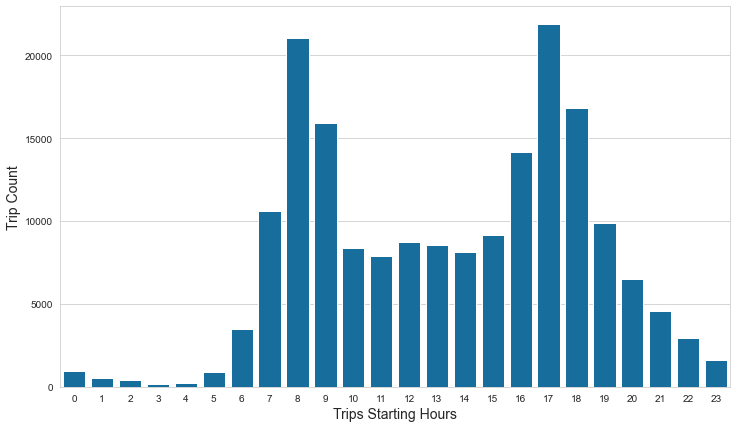

In [12]:
# Exploring Start Hour Distribution :
plt.figure(figsize=[12,7])
base_color = sb.color_palette('colorblind')[0]
sb.set_style('whitegrid')
sb.countplot(data=bike , x='start_hour', color = base_color)
plt.xlabel('Trips Starting Hours' , fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14);


- Trips Starting Hours distribution is a bimodal distribution. we have two peak periods for trips.
from 6 to 9 AM and from 4 to 6 PM. Most of the trips occurred during rush hours (when going or back from work).In other words, Riders using the Bike Share System Mainly to go to their work.

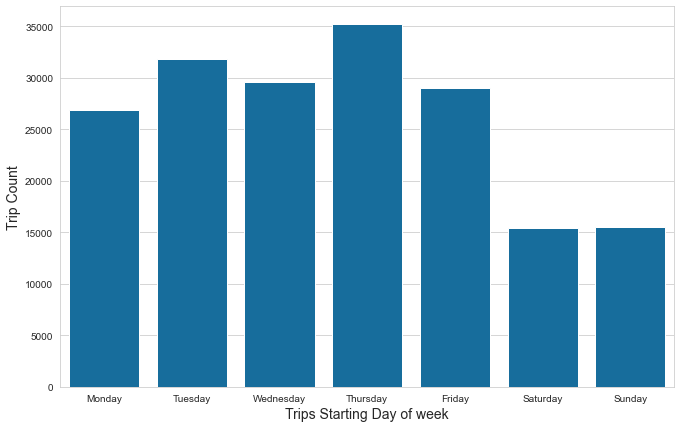

In [13]:
# Exploring Start Day of week Distribution :
plt.figure(figsize=[11,7])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
w_day_cat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike['start_day'] = bike['start_day'].astype(w_day_cat)
base_color = sb.color_palette('colorblind')[0]
sb.set_style('whitegrid')
sb.countplot(data=bike , x='start_day', color = base_color)
plt.xlabel('Trips Starting Day of week', fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14);

- The Distribution of Trip Starting Day of week Confirms the previous conclusion. weekend days have the least Trips among the whole week.

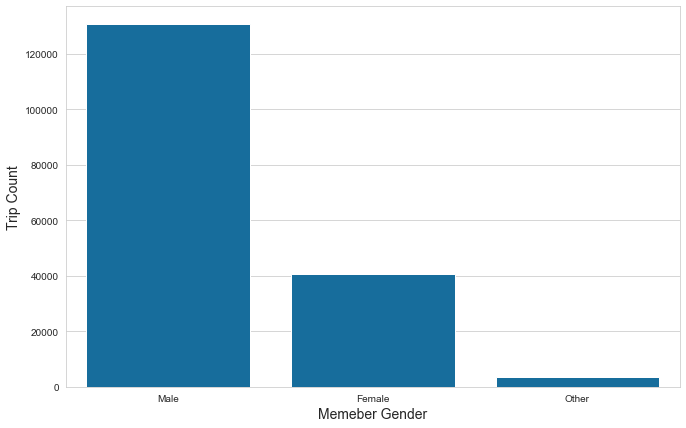

In [14]:
# Exploring Memeber Gender Distribution :
plt.figure(figsize=[11,7])
freq = bike['member_gender'].value_counts()
gen_order = freq.index   
base_color = sb.color_palette('colorblind')[0]
sb.set_style('whitegrid')
sb.countplot(data=bike , x='member_gender', color = base_color, order = gen_order)
plt.xlabel('Memeber Gender', fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14);

- Distribution Shows that Males use Bike Share System 3 times than Females

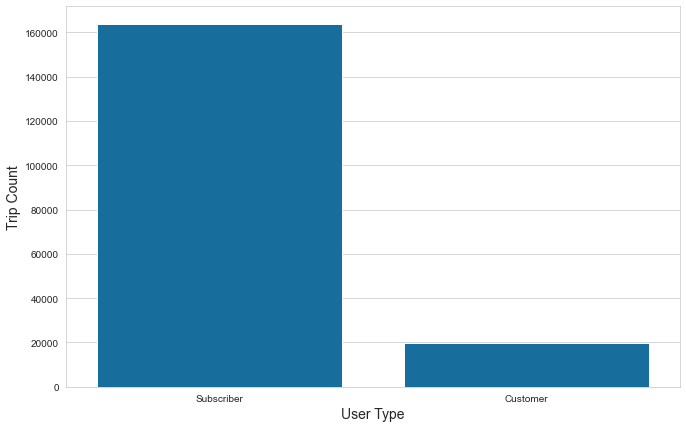

In [15]:
# Exploring User Type Distribution :
plt.figure(figsize=[11,7])
freq = bike['user_type'].value_counts()
gen_order = freq.index   
base_color = sb.color_palette('colorblind')[0]
sb.set_style('whitegrid')
sb.countplot(data=bike , x='user_type', color = base_color, order = gen_order)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14);

- User Type Distribution Shows that 87.5% of Trips occurred by Subscribers & 12.5% by Customers.

In [16]:
# Check duration in min to discover the values :
bike['duration_min'].describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

In [17]:
# As it appeared above, we have an unordinary Max Value so we will describe the variable using log scale
# Transform the describe() to a scale of log10 :
np.log(bike['duration_min'].describe())

count    12.119490
mean      2.493313
std       3.398076
min       0.016529
25%       1.689481
50%       2.147879
75%       2.585255
max       7.261272
Name: duration_min, dtype: float64

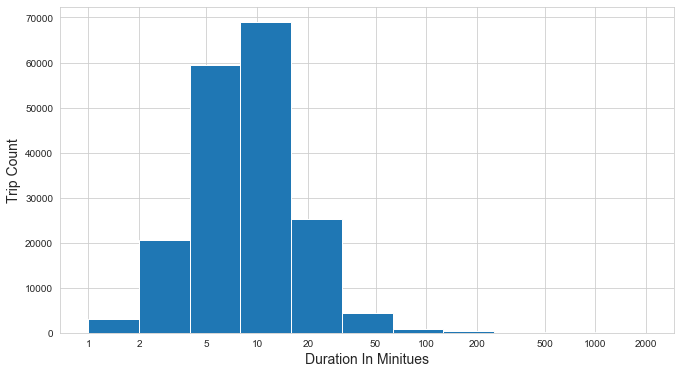

In [18]:
plt.figure(figsize=[11,6])
# Axis transformation
# Bin size:
bins =  10 ** np.arange(0,np.log10(bike['duration_min'].max())+0.3,0.3)
ticks =  [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
# Plot the histogram
plt.hist(data=bike, x='duration_min', bins=bins)
# Plot xscale:
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.xlabel('Duration In Minitues', fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14);

- After applying log scale transformation. the Duration min turned to normal distribution.
- About 75% from Trips Duration is 13 min. 
- Minimum Trip Duration is & Maximum is 1424 min. I've to check the outlier's value to check how these values affect the mean.

In [19]:
# Dropping Trips which have duration min > 100 :
bike.drop(bike.index[bike['duration_min'] > 100], inplace = True)


In [20]:
# Make a new df :
bike2 = bike.copy()

In [21]:
# Check values after dropping:
bike2[bike2['duration_min'] > 100].shape[0]

0

In [22]:
# Check Trip duration values after dropping outliers :
bike2['duration_min'].describe()

count    182503.000000
mean         10.681581
std           8.663224
min           1.016667
25%           5.400000
50%           8.533333
75%          13.166667
max          99.766667
Name: duration_min, dtype: float64

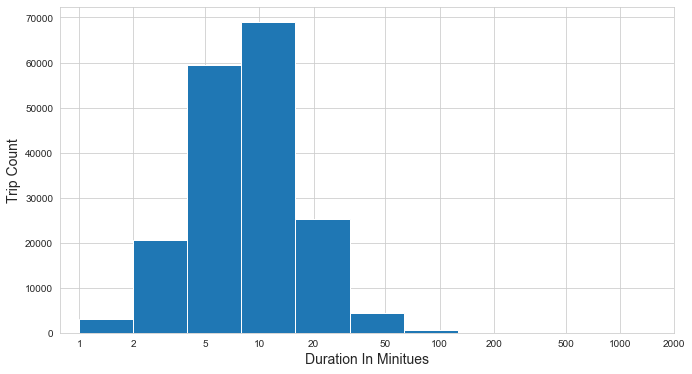

In [23]:
plt.figure(figsize=[11,6])

# Bin size:
bins =  10 ** np.arange(0,np.log10(bike2['duration_min'].max())+0.3,0.3)
ticks =  [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
# Plot the histogram
plt.hist(data=bike2, x='duration_min', bins=bins)
# Plot xscale:
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.xlabel('Duration In Minitues', fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14);

- After Dropping the outliers. I found that the mean value is 10 min instead of 12 min. so, it wasn't a big effect that happened to the mean because of outliers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>- Trips starting hour and trip weekday shows that rides occurred in the rush hour of the working days
>- Male riders representing 75% from Trips & 25% of trips representing female riders.
>- Subscriber riders representing 87.5% from Trips & 12.5% of trips representing customer riders.
>- 87.5% of Trips occurred by Subscribers & 12.5% by Customers.
>- Most Trips were short from 5 to 13 min


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - I have to add log transformation to duration in minutes to represent values and outliers have been dropped to check their effect on the mean but I didn't find a big effect.

## Bivariate Exploration



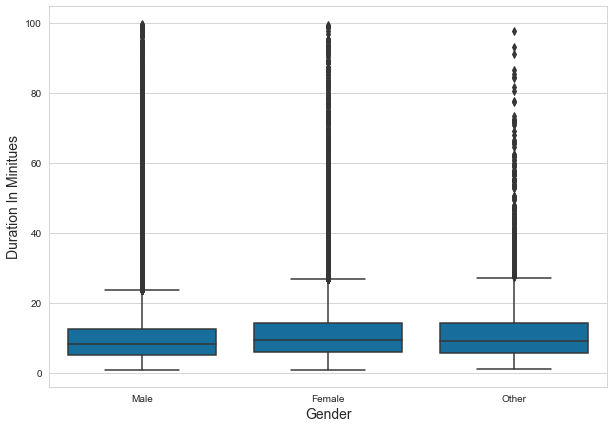

In [24]:
plt.figure(figsize=[10,7])
sb.boxplot(data=bike, x='member_gender' , y='duration_min',color=base_color)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Duration In Minitues' , fontsize = 14);

>- In general, Females take longer trips than Males. but differences are not huge.

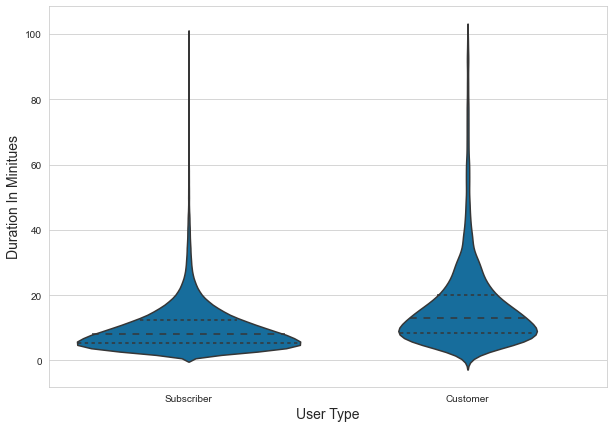

In [25]:
plt.figure(figsize=[10,7])
sb.violinplot(data=bike, x='user_type' , y='duration_min',color=base_color, inner='quartile')
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Duration In Minitues' , fontsize = 14);

>- Subscriber's curve is wider (have more data points) and tends to have short & regular trips. unlike Customers who tend to take longer rides.

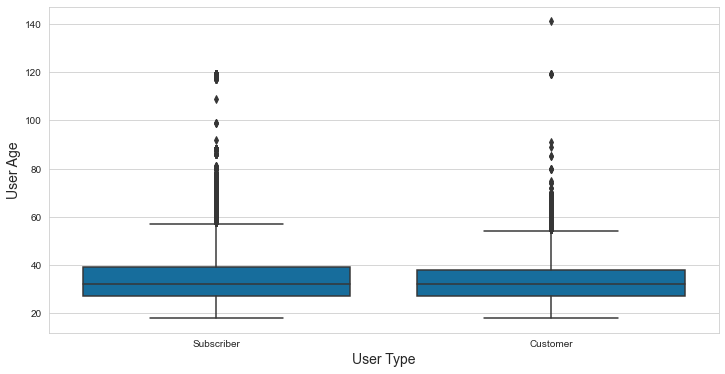

In [26]:

plt.figure(figsize=[12,6])
sb.boxplot(data=bike, x='user_type' , y='user_age',color=base_color)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('User Age' , fontsize = 14);

>- User Ages are very close between Subscribers & Customers. Subscribers are older with small differences.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Summary of relationships found in the dataset:
>- Females take longer trips than Males. but differences are not huge.
>- Subscriber's curve is wider (have more data points) and tends to have short & regular trips. unlike Customers who tend to take longer rides.
>- User Ages are very close between Subscribers & Customers. Subscribers are older with small differences.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is something unexpected "simpson's parodontax". higher values (gender and user type) led to the lower trip duration. Males are higher than females but trip duration for females is higher. Also, Subscribers are higher than customers but customers have a longer trip duration.

## Multivariate Exploration



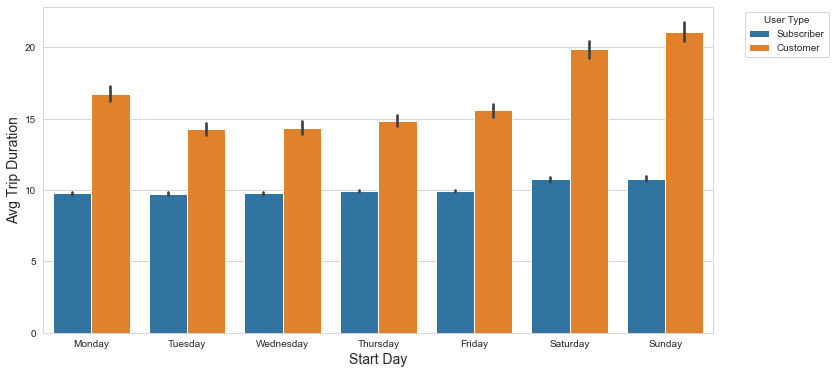

In [27]:
plt.figure(figsize=[12,6])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
w_day_cat2 = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike['start_day'] = bike['start_day'].astype(w_day_cat2)
ax = sb.barplot(data = bike, x = 'start_day', y = 'duration_min', hue = 'user_type')
ax.legend(loc = 8, ncol = 2, framealpha = 1, title = 'user_type')
plt.xlabel('Start Day', fontsize = 14)
plt.ylabel('Avg Trip Duration' , fontsize = 14)
plt.legend(bbox_to_anchor=(1.04,1) ,title='User Type', loc="upper left");

>- Subscribers & customers have an average trip duration almost fixed during working days or weekends.
In general, average trip duration for customers is higher than subscribers.

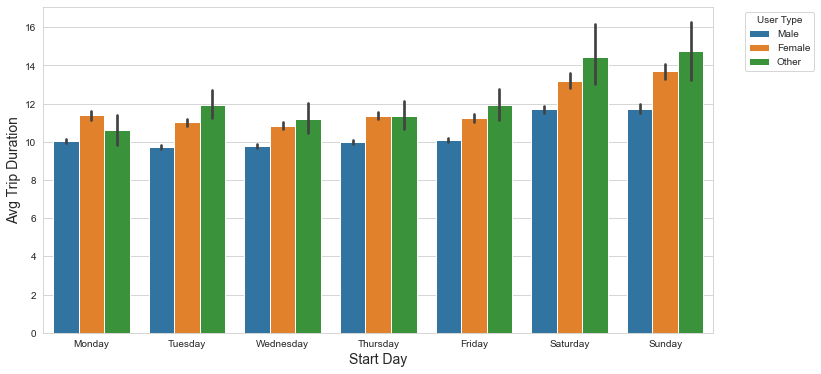

In [28]:
plt.figure(figsize=[12,6])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
w_day_cat3 = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike['start_day'] = bike['start_day'].astype(w_day_cat3)
ax = sb.barplot(data = bike, x = 'start_day', y = 'duration_min', hue = 'member_gender')
ax.legend(loc = 8, ncol = 2, framealpha = 1, title = 'user_type')
plt.xlabel('Start Day', fontsize = 14)
plt.ylabel('Avg Trip Duration' , fontsize = 14)
plt.legend(bbox_to_anchor=(1.04,1) ,title='User Type', loc="upper left");

>- Males & Females have an average trip duration almost fixed during working days or weekends.
In general, average trip duration for Females is higher than Males.

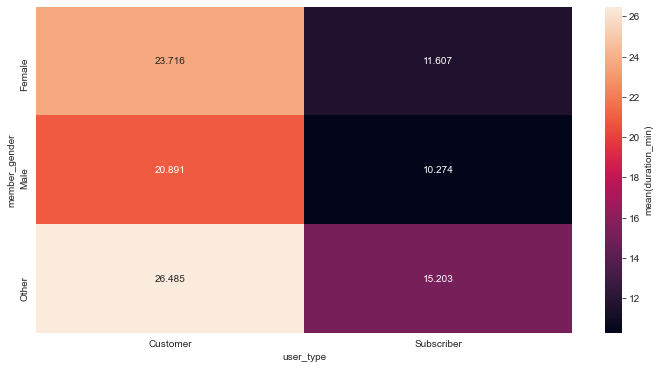

In [29]:
plt.figure(figsize=[12,6])
cat_means = df.groupby(['user_type', 'member_gender']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'});

>- Heatmap confirms the previous findings. average trip duration for females is higher than males. Also,
average trip duration for customers is higher than subscribers.

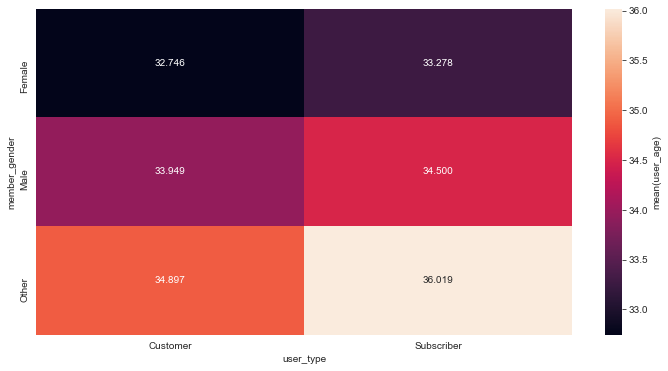

In [30]:
plt.figure(figsize=[12,6])
cat_means = df.groupby(['user_type', 'member_gender']).mean()['user_age']
cat_means = cat_means.reset_index(name = 'user_age_avg')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'user_age_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(user_age)'});

>- Heatmap shows that. the average age for males is higher than for females. Also,
the average age for subscribers is slightly higher than customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Average trip duration for customers is higher than subscribers & Both of them have an average trip duration almost fixed during working days or weekends. this confirms that subscribers tend to have short & regular trips unlike customers  who tend to take longer rides.
>- Avg trip duration for female subscribers is 11.6 min.
>- Avg trip duration for male subscribers is 10.27 min.
>- Avg trip duration for female customers is 23.71 min.
>- Avg trip duration for male subscribers is 20.89 min.
> - Average age for males is higher than females & Average age for subscribers is slightly than customers.
>- Avg age for female subscribers is 33 year.
>- Avg age for male subscribers is 34 year.
>- Avg age for female customers is 32 year.
>- Avg age for male customers is 33 year.


### Were there any interesting or surprising interactions between features?

> The same Simpson's paradox was found. males are 3 times higher than females but have avg trip duration lower than females. Also, subscribers are representing 87.5% of the dataset but have a lower avg trip duration than the customers.